# Tasks
Using the pre-processed data from the file `demographics.txt` or `demographics.xls` obtained
from the previous tasks:
1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.
2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.
3. Plot the results of the regression.
4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.

In [80]:
# Prepare the regression model

from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


df_x = pd.read_csv('../1_task_one/imputed_data_knn.csv', sep=',')

# Mix the dataset
df_x = df_x.sample(frac=1)
df_y = df_x["Group"]

# Removing non independent variables and non-relevant ones; ID and Study are not relevant for the results as they are just defined for recognizing the results
df_x = df_x.drop(columns=["Group", "ID", "Study", "Subjnum"])

#Data split into train and test:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.40)

# Increase iterations because default 100 does not converge
regression = LogisticRegression(max_iter=3000)

regression.fit(df_x_train, df_y_train)

#Evaluate the model:
print("Mean Accuracy on training data: %f" % regression.score(df_x_train, df_y_train))
print("Mean Accuracy on test data: %f" % regression.score(df_x_test, df_y_test))

y_pred_train = regression.predict(df_x_train)
y_pred_test = regression.predict(df_x_test)

f1_score_train = f1_score(df_y_train, y_pred_train)
f1_score_test = f1_score(df_y_test, y_pred_test)
print("F1-score on training data: %f" % f1_score_train)
print("F1-score on test data: %f" % f1_score_test)


Mean Accuracy on training data: 0.898990
Mean Accuracy on test data: 0.880597
F1-score on training data: 0.907407
F1-score on test data: 0.902439


In [81]:
import numpy as np
np.set_printoptions(suppress=True)
# 1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.

# Calculate the predicted probabilities; Documentation:
# Probability estimates.
# The returned estimates for all classes are ordered by the label of classes.
predicted_probabilities = regression.predict_proba(df_x_train)

# Get index for the PD group (1)
index_pd = regression.classes_.tolist().index(1)

# Get index for the CO group (2)
index_co = regression.classes_.tolist().index(2)

# Access the probabilities for each group
probability_pd = predicted_probabilities[:, index_pd]
probability_co = predicted_probabilities[:, index_co]

# compare accuracy with ground truth

# calculate the mean probabilities for each group
print("The average probability of PD is:")
print(probability_pd.mean())

print("\n The probability of all subjects having PD:")
print(probability_pd)

print("\nThe average probability of being a CO:")
print(probability_co.mean())

print("\n The probability of all subjects being a CO:")
print(probability_co)

The average probability of PD is:
0.5252520726443609

 The probability of all subjects having PD:
[0.28993486 0.24052964 0.01481185 0.20718209 0.99351029 0.7756203
 0.99625788 0.02722898 0.83546812 0.87201945 0.8272599  0.89464452
 0.0121646  0.88950128 0.99999918 0.20703653 0.00619335 0.01766194
 0.76371392 0.99933031 0.59712831 0.99460826 0.9983234  0.00439608
 0.00265519 0.00380288 0.62648548 0.00443594 0.95558764 0.76902042
 0.26346863 0.00464153 0.49420988 0.66722755 0.93692357 0.95741249
 0.04468385 0.76787884 0.99995224 0.99999994 0.84337344 0.53880327
 0.97228351 0.99939593 0.84482826 0.87219533 0.43707044 0.01881396
 0.93521042 0.99993839 0.91379183 0.00272141 0.19893333 0.03985711
 0.68774781 0.13628302 0.05813932 0.01113857 0.00389773 0.25714656
 0.99772909 0.99965303 0.87469992 0.84740658 0.71267199 0.97440096
 0.98685755 0.99351301 0.51241668 0.81990574 0.58057822 0.91484976
 0.03907008 0.88567622 0.00413039 0.50702677 0.00359478 0.22591068
 0.65061752 0.00397426 0.0818426


For a visual comparison, the first 15 probabilities are plotted against the respective ground truth.
Looking at it, we can see that aside from some outliers - that are expected as the accuracy is not 1.0 - the probabilites for each of the ground truth results seems rather fitting.
The points with the value 1 have a high probability for being PD (which they are) and a low probability for CO (which they are not) and vice versa.



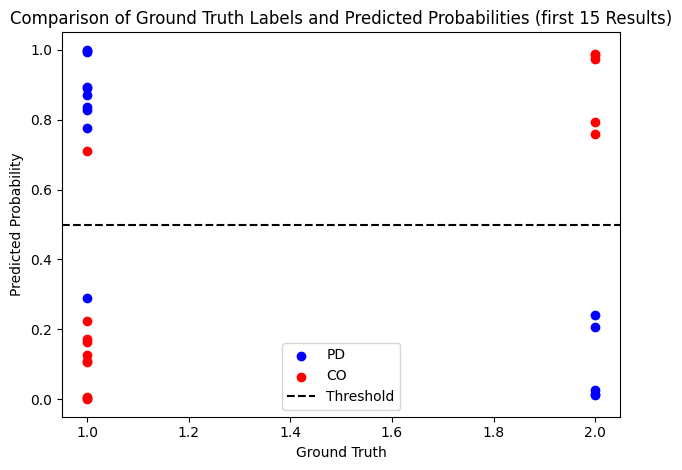

In [82]:
# Get the predicted probabilities for PD and CO classes for the first 15 results
probability_pd = predicted_probabilities[:15, 0]
probability_co = predicted_probabilities[:15, 1]
ground_truth = df_y_train[:15]

print("""
For a visual comparison, the first 15 probabilities are plotted against the respective ground truth.
Looking at it, we can see that aside from some outliers - that are expected as the accuracy is not 1.0 - the probabilites for each of the ground truth results seems rather fitting.
The points with the value 1 have a high probability for being PD (which they are) and a low probability for CO (which they are not) and vice versa.
""")

# Plot the ground truth labels vs. predicted probabilities
plt.scatter(ground_truth, probability_pd, color='blue', label='PD')
plt.scatter(ground_truth, probability_co, color='red', label='CO')
plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Probability')
plt.title('Comparison of Ground Truth Labels and Predicted Probabilities (first 15 Results)')
plt.legend()

plt.tight_layout()
plt.show()


In [83]:
# 2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.

# documentation: Coefficient of the features in the decision function.
beta_coefficients = regression.coef_

columns = df_x_train.columns

print("Beta Coefficients:")
for i, coef in enumerate(beta_coefficients[0]):
    print('{:>12}  {:>10}  {:>25}  {:>30}'.format(columns[i], f"β{i+1} =", coef, f"alternatively {coef:.4f} * x_{{{columns[i]}}}"))

Beta Coefficients:
      Gender        β1 =        -0.5337150277502579  alternatively -0.5337 * x_{Gender}
         Age        β2 =        -0.1325311021843055  alternatively -0.1325 * x_{Age}
      Height        β3 =       -0.05205196584504357  alternatively -0.0521 * x_{Height}
      Weight        β4 =     -0.0060844130057552915  alternatively -0.0061 * x_{Weight}
   HoehnYahr        β5 =        -1.2255701692012888  alternatively -1.2256 * x_{HoehnYahr}
       UPDRS        β6 =       -0.06721387047109685  alternatively -0.0672 * x_{UPDRS}
      UPDRSM        β7 =       -0.09325247347046572  alternatively -0.0933 * x_{UPDRSM}
        TUAG        β8 =        -0.4652236404645053  alternatively -0.4652 * x_{TUAG}
    Speed_01        β9 =         0.6405973090071707  alternatively 0.6406 * x_{Speed_01}
    Speed_02       β10 =          0.159192209557495  alternatively 0.1592 * x_{Speed_02}
    Speed_03       β11 =        0.45645140121178474  alternatively 0.4565 * x_{Speed_03}
    Speed_04 

The beta coefficients nicely show the impact of their respective features. For example, it is clear that changes to *Speed_10* do have quite the impact on the outcome as the beta coefficient is very high. 
On the other hand, the height has a much lower beta coefficent, therefore changing its values is not impacting the result much.


To plot the logistic regression, the probabilities for each datapoint and group are plotted. 
As a regression line I chose a threshold of 0.5 as probabilities above it would make the datapoint part of the regarding group. 
Below would make it part of the other one.
Please note that the test dataset has only 67 datapoints which is why the plots only have a length of 67.


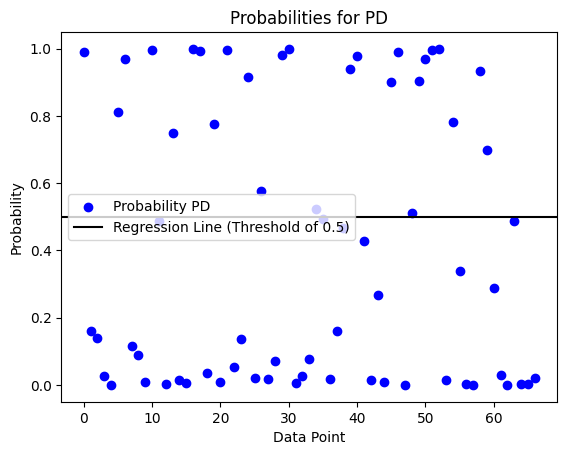

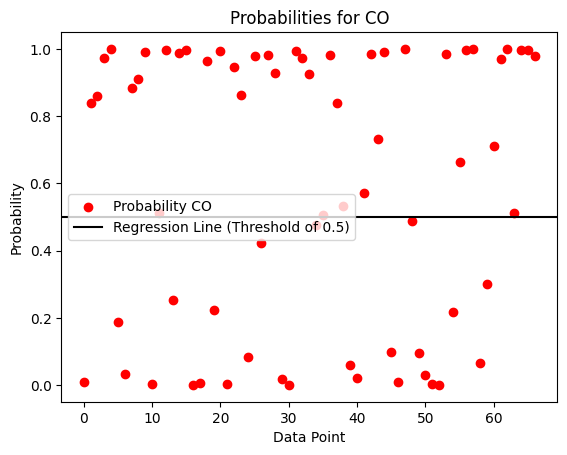

In [84]:
# 3. Plot the results of the regression.
columns = df_x_train.columns
num_cols = len(columns)
probabilities = regression.predict_proba(df_x_test)

# Extract the probabilities for each class
probability_pd = probabilities[:, 1]  # Probabilities for the positive class (PD)
probability_co = probabilities[:, 0]  # Probabilities for the negative class (CO)

print("""
To plot the logistic regression, the probabilities for each datapoint and group are plotted. 
As a regression line I chose a threshold of 0.5 as probabilities above it would make the datapoint part of the regarding group. 
Below would make it part of the other one.""")
print(f'Please note that the test dataset has only {len(df_x_test)} datapoints which is why the plots only have a length of {len(probabilities)}.')

# Plot probabilities for PD
plt.scatter(range(len(probability_pd)), probability_pd, color='blue', label='Probability PD')
plt.axhline(y=0.5, color='black', linestyle='-', label='Regression Line (Threshold of 0.5)')
plt.xlabel('Data Point')
plt.ylabel('Probability')
plt.title('Probabilities for PD')
plt.legend()
plt.show()

# Plot probabilities for CO
plt.scatter(range(len(probability_co)), probability_co, color='red', label='Probability CO')
plt.axhline(y=0.5, color='black', linestyle='-', label='Regression Line (Threshold of 0.5)')
plt.xlabel('Data Point')
plt.ylabel('Probability')
plt.title('Probabilities for CO')
plt.legend()
plt.show()


Alternatively, we can graphically compare the predicted results with the ground truth, which visually enhances what the accurcay already displayed:
Many predictions align with the ground truth, but there are some misclassifications.


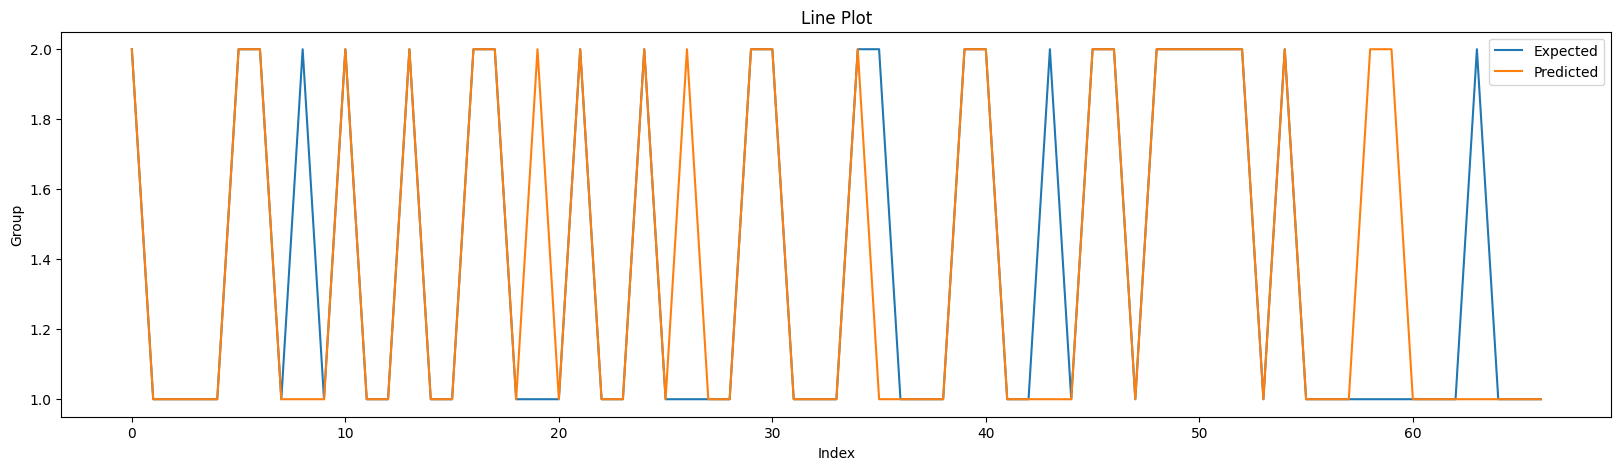

In [85]:
print("""
Alternatively, we can graphically compare the predicted results with the ground truth, which visually enhances what the accurcay already displayed:
Many predictions align with the ground truth, but there are some misclassifications.""")

y_pred = regression.predict(df_x_test)
# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 5))
x = list(range(len(y_pred)))
# Plot the lines
ax.plot(x, df_y_test, label='Expected')
ax.plot(x, y_pred, label='Predicted')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Group')
ax.set_title('Line Plot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Use threshold to plot probabilities like linear regression

In [86]:
# 4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math 

test = df_y_test.to_list()
mae = 0
length = len(y_pred)

#mean absolute error
for i in range(length):
    res = abs(test[i] - y_pred[i])
    mae = mae + res

mae_final = mae / length
print(f"the mean absolute error manually calculated is {mae_final}")

rmse = 0
for i in range(length):
    res = math.pow(test[i] - y_pred[i], 2)
    rmse = rmse + res

rmse_final = math.sqrt(rmse / length)
print(f"the root mean squared error manually calculated is {rmse_final}")
df = pd.DataFrame()
print(f"the mean absolute error using sklearn is {mean_absolute_error(df_y_test, y_pred)}")
print(f"the root mean squared error using sklearn is {np.sqrt(mean_squared_error(df_y_test, y_pred))}")

the mean absolute error manually calculated is 0.11940298507462686
the root mean squared error manually calculated is 0.34554737023254406
the mean absolute error using sklearn is 0.11940298507462686
the root mean squared error using sklearn is 0.34554737023254406


The mean absolute error is very low, whilst the root mean squared error is somewhat in the middle-low area. Generally, the MAE focuses on the average distance between the ground truth and the prediction but is not impacted specifically by larger errors, which the RMSE is. 
With this in mind, the low MAE suggests that the model's predictions are generally accurate. However, the higher RMSE indicates that there are cases where the model's predictions differ significantly from the expected values. These instances could be a good starting point if one would want to further improve the model.

One possible reason for the higher RMSE could be the presence of outliers in the data, which have a larger impact on the RMSE calculation. 